In [65]:
Partie I
import pandas as pd

df = pd.read_excel('C:/Users/HP/miniconda3/condabin/data-sell4all.xlsx', usecols="A:D", index_col=None)
df.index += 1

print("Les informations sur les 5 premières lignes du fichier Excel :\n\n")
print(df.head())

print("\n\nLe résumé technique des données :")
print(df.info())




Les informations sur les 5 premières lignes du fichier Excel :


      Pays  Age    Genre Dépenses des clients
1   France    32  Female               150.50
2  Germany    45    Male               200.75
3    Spain    28  Female                75.25
4    Italy    39    Male               180.00
5       UK    52  Female               250.30


Le résumé technique des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 1 to 65
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None


In [14]:
#Le résumé technique du DataFrame fournit les informations suivantes :

#1. **Classe et Index** :
   #- `<class 'pandas.core.frame.DataFrame'>` : Il s'agit du type de l'objet, qui est un DataFrame de Pandas.
   #- `RangeIndex: 65 entries, 1 to 65` : Le DataFrame contient 65 entrées (lignes) indexées de 1 à 65. Cela signifie que l'index commence à 1 plutôt qu'à 0, ce qui est typique des fichiers Excel où les lignes commencent à 1.

#2. **Colonnes du DataFrame** :
#   - Le DataFrame a un total de 4 colonnes.

#3. Détails des Colonnes :
#   - Column : Le nom de la colonne.
#   - Non-Null Count : Le nombre de valeurs non nulles dans chaque colonne, ce qui indique combien de valeurs manquent (NaN) dans chaque colonne.
#  - Dtype : Le type de données de chaque colonne. Dans ce cas, toutes les colonnes sont de type `object`, ce qui signifie qu'elles contiennent des données textuelles ou des données qui n'ont pas été automatiquement converties en types numériques.

#   - Pays :
#     - 65 valeurs non nulles
#     - Type de données : `object`
#   - Age :
#     - 62 valeurs non nulles
#     - Type de données : `object`
#     - Il semble y avoir des valeurs manquantes ou des valeurs non convertibles en nombres.
#   - Genre :
#     - 64 valeurs non nulles
#     - Type de données : `object`
#  - Dépenses des clients :
#    - 63 valeurs non nulles
#   - Type de données : `object`
#   - Comme pour la colonne `Age`, les valeurs pourraient nécessiter une conversion.

#4. Utilisation de la Mémoire:
#   - `memory usage: 2.2+ KB` : il indique l'espace mémoire utilisé par le DataFrame, qui est d'environ 2.2 Ko.


In [64]:
# Calculer la médiane et la moyenne pour "Âge" et "Dépenses des clients"

mo_a = df['Age'].mean()
me_a = df['Age'].median()

mo_d = df['Dépenses des clients'].mean()
me_d = df['Dépenses des clients'].median()

print(f"\nLa moyenne de l'age est de : {mo_a:.2f}, La médiane de l'age est de: {me_a:.2f}")
print(f"La moyenne des dépenses est de : {mo_d:.2f}, La médiane des dépenses est de : {me_d:.2f}")




La moyenne de l'age est de : 54.23, La médiane de l'age est de: 36.50
La moyenne des dépenses est de : 18014.62, La médiane des dépenses est de : 167.50


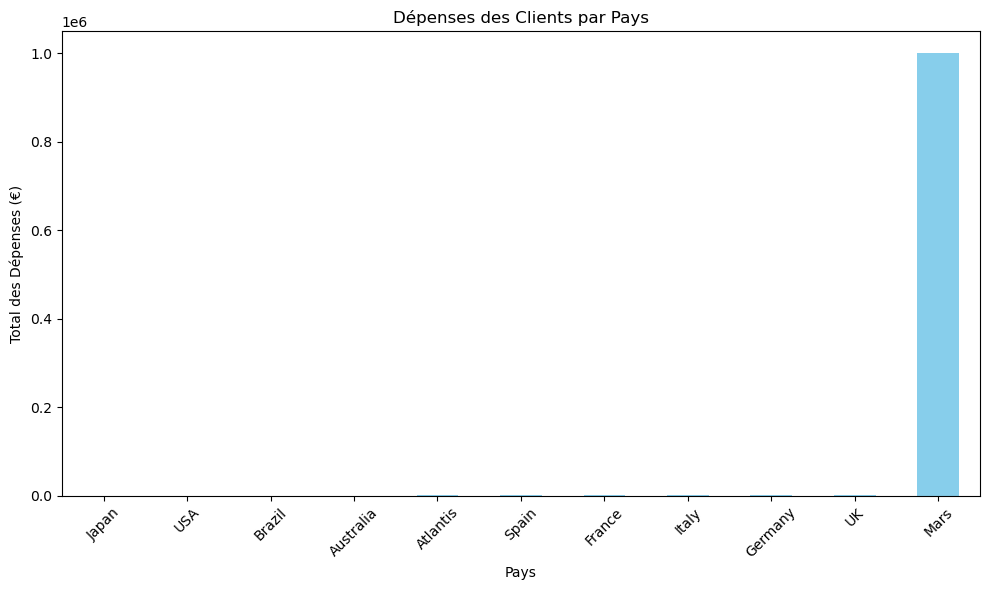

Les données nettoyées ont été enregistrées dans 'data-sell4all_cleaned.csv'.


In [67]:
#PARTIE 2
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('C:/Users/HP/miniconda3/condabin/data-sell4all.xlsx')

df.columns = df.columns.str.strip()

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')

df = df.dropna(subset=['Age', 'Dépenses des clients'])

df = df[df['Dépenses des clients'] >= 10]

df = df.drop_duplicates()

plt.figure(figsize=(10, 6))
df.groupby('Pays')['Dépenses des clients'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Dépenses des Clients par Pays')
plt.xlabel('Pays')
plt.ylabel('Total des Dépenses (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_cleaned = df[['Pays', 'Age', 'Genre', 'Dépenses des clients']]
df_cleaned.to_csv('C:/Users/HP/miniconda3/condabin/data-sell4all_cleaned.csv', index=False)

print("Les données nettoyées ont été enregistrées dans 'data-sell4all_cleaned.csv'.")
